# EPS 109 "Computer Simulations in Earth and Planetary Science"
### Instructor: Burkhard Militzer
### Combined lab and homework assignment 3: part 1

Create a new folder on your computer for this assignment. From bCourses, download your personal data set, the solutions files 'x_positions_2023.txt' with the exact positions, and everyone's data sets stored in 'submissions_2023.zip'




In [1]:
#Load the usual NumPy and MatPlotLib packages but also 'glob' so that we can read many files more easily.
import matplotlib.pyplot as plt
import numpy as np
import glob
%config InlineBackend.figure_format = 'retina'

In [2]:
!pip install pandas
import pandas as pd

With the command np.loadtxt(...), load the solution file and your dataset. If you do not have your personal dataset for some reason, you are free to work with someone else guesses but please note this clearly in your homework submission.

Store the length of the datasets in the variable 'nNumbers'. We know the number is 100 but Jupyter does not. Use this variable whenever it is needed later. Plot your data set and the solutions in one diagram. The x axis should be the index of the 100 positions. Add a labels and legend with 'plt.legend()'. Insert a comment how well your dataset agrees with the solution. 

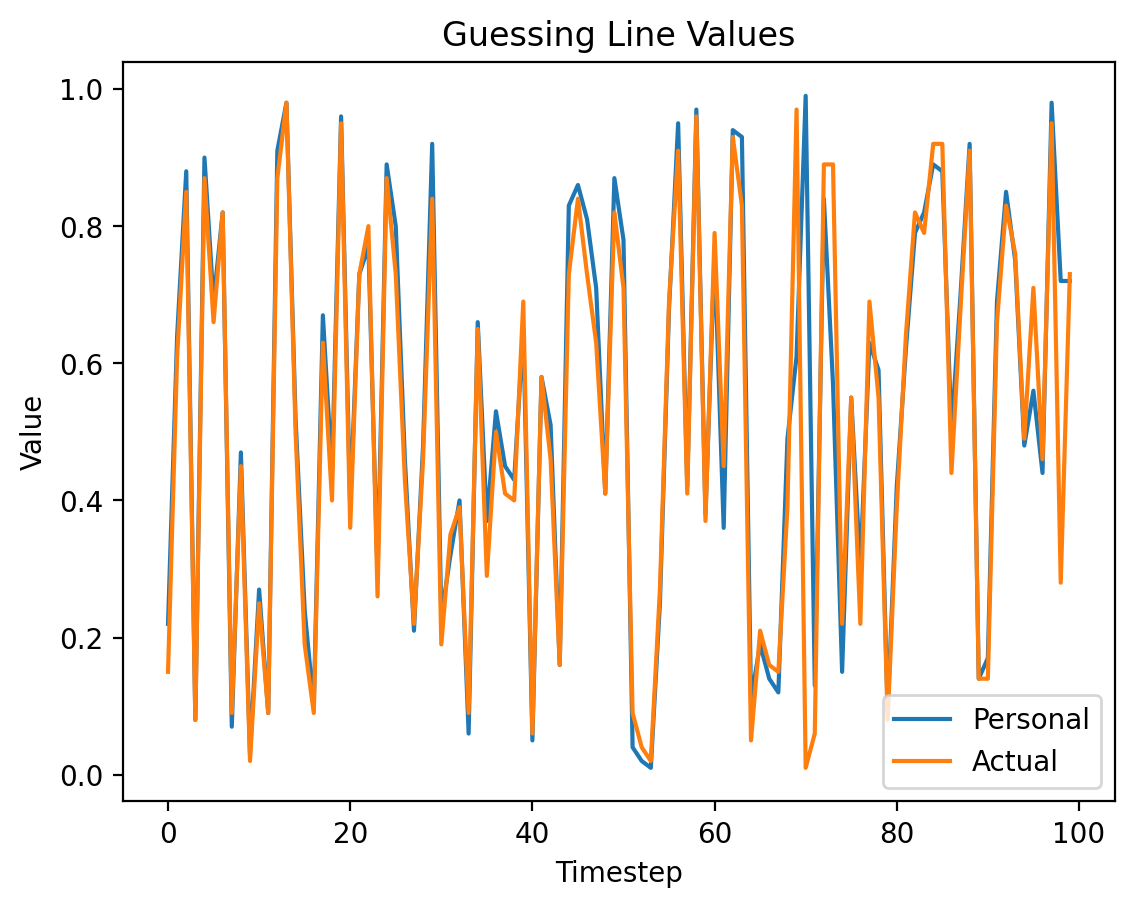

In [3]:
#Download data, mine and the standard
my_data = np.loadtxt('Tyler_Marino_xcoords.txt')
standard_vals = np.loadtxt('x_positions_2023.txt')
#my_data = np.insert(my_data, 8, .80)
my_data = np.delete(my_data, 6)
my_data = np.append(my_data,.72)
#plot both my guesses and the accurate vals
items = range(100)
nNumbers = len(my_data)
plt.plot(items, my_data, label = 'Personal')
plt.plot(items, standard_vals, label = 'Actual')
plt.legend()
plt.title('Guessing Line Values')
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.show()


In [4]:
# comment: My dataset originally had an item misindexed or something because my data was shifted, I found the position of the incorrect plot and corrected this. Now my work is better.

Now we plot both data sets in a different way. Make a XY scatter plot (no lines) where Y points are your guesses and the X points are the solutions. Explain how should this plot should look if you had guessed very accurately. Does your plot look ideal?

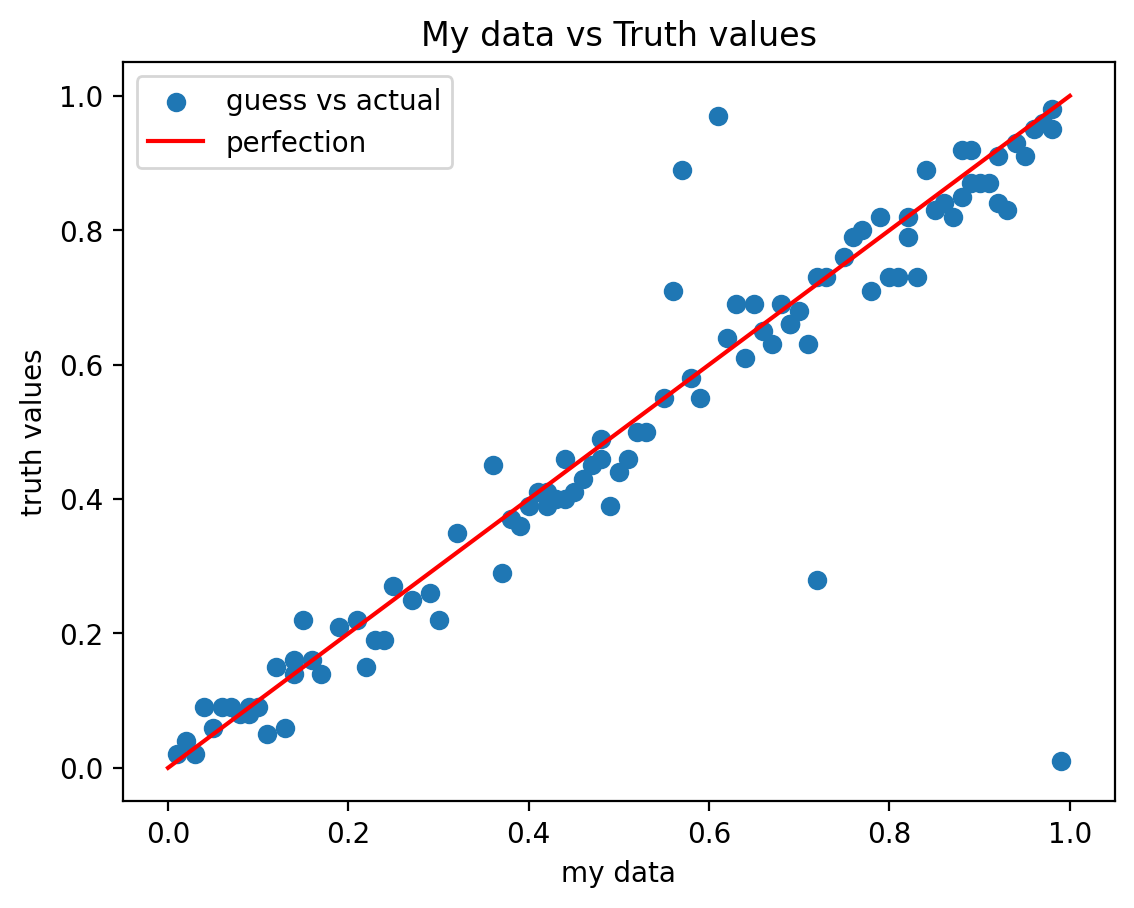

In [5]:
##This scatter plot should model a perfect linear 
# line. The points that fall along the red line 
# I have plotted are those which my guess was
#  acurate, but the ones that fall off 
# show how my guess was off and by how much. 
# Notice some far apart guesses?? Maybe this
#  has to do with me missing a value and 
# making up a number?

plt.scatter(my_data, standard_vals, label ='guess vs actual')
x = np.linspace(0, 1, 100)
plt.plot(x, x, c ='red', label = 'perfection')
plt.legend()
plt.xlabel('my data')
plt.ylabel('truth values')
plt.title('My data vs Truth values')
plt.show()

Plot the difference between your data and the solution. (Taking the difference requires only one line of code.) The X values should be the index of the data point from 0 to 99. Add a thin line that marks zero deviation. Print the values of the most positive and most negative deviation. Please briefly explain these extreme discrepancies.

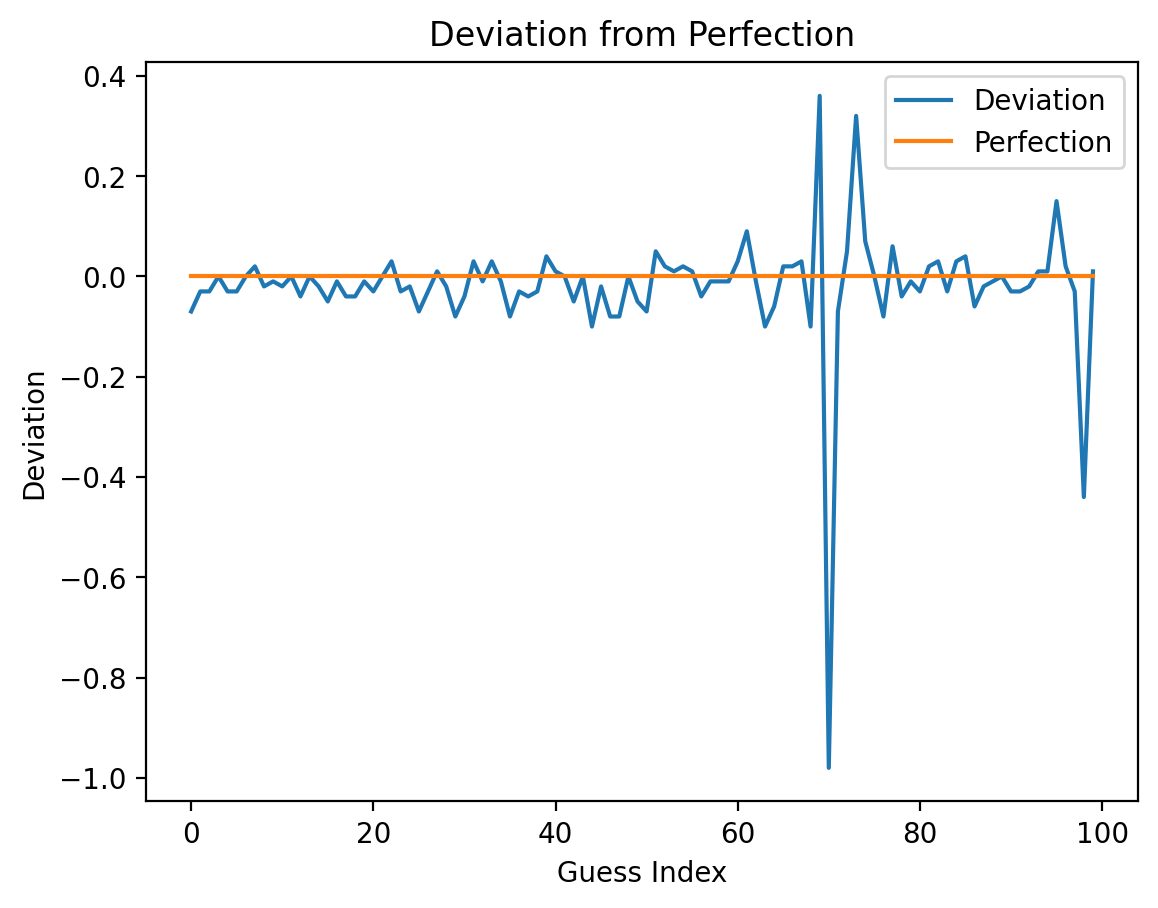

The deviation at guess 69 is 0.36
The deviation at guess 70 is -0.98
The deviation at guess 73 is 0.32000000000000006
The deviation at guess 98 is -0.43999999999999995


In [6]:
differences = standard_vals - my_data
plt.plot(items, differences, label = 'Deviation')
plt.plot(items, np.zeros(100), label = 'Perfection')
plt.legend()
plt.title('Deviation from Perfection')
plt.xlabel('Guess Index')
plt.ylabel('Deviation')
plt.show()

def most_deviation(deviation_list):
    dictionary = {}
    for index, val in enumerate(deviation_list):
        if abs(val) > .2:
            dictionary[index] = val
    return dictionary
large_deviation = most_deviation(differences) 
for i in range(len(list(large_deviation.values()))):
    print(f'The deviation at guess {list(large_deviation.keys())[i]} is {list(large_deviation.values())[i]}')

In [7]:
# Comment: This is likely from me missing the value so I had to make up a value or I misindexed the value. I inverted my data collection method!!

Compute the average of the difference between your data and the solution. Include the sign of the difference in the summation. Then write a comment on the sign of the average.

In [8]:
diff_sum = 0
for i in differences:
    diff_sum+= i
avg_diff = diff_sum/nNumbers
print(f'the average difference is {avg_diff}')



the average difference is -0.0199


In [9]:
# Comment: The negative means I tended to underguess as opposed to overguess. AKA i favored the left. 
# Might have been a combo of my poor eyesight(emphasis on better vision in my right eye so I was overcompensating?)

Compute and print the variance and the standard deviation sigma between your data set and the solution as described on the lecture notes. 

In [10]:
diff_centered = differences - avg_diff
var = sum(diff_centered**2)/(nNumbers-1)
std = var**(1/2)
print(f'The variance is: {var} \nThe standard deviation is: {std}')

The variance is: 0.015433323232323234 
The standard deviation is: 0.12423092703639957


Let us assume we know the average is zero. Let us recalculate the variance and the standard deviation. [Where you divided by (nNumbers-1), you now need to divide by nNumbers.]

In [11]:
var_0 = sum(differences**2)/nNumbers
print('The variance centered at 0 is:', var_0)

The variance centered at 0 is: 0.01567499999999999


Let us assume you have stored the deviation between your guesses and the solutions in a vector 'diff'. With the command 'plt.hist(diff, 10)' generate a probability distribution of a histogram of these deviations. Adjust the number of bins, 10, until your are happy with the curve.

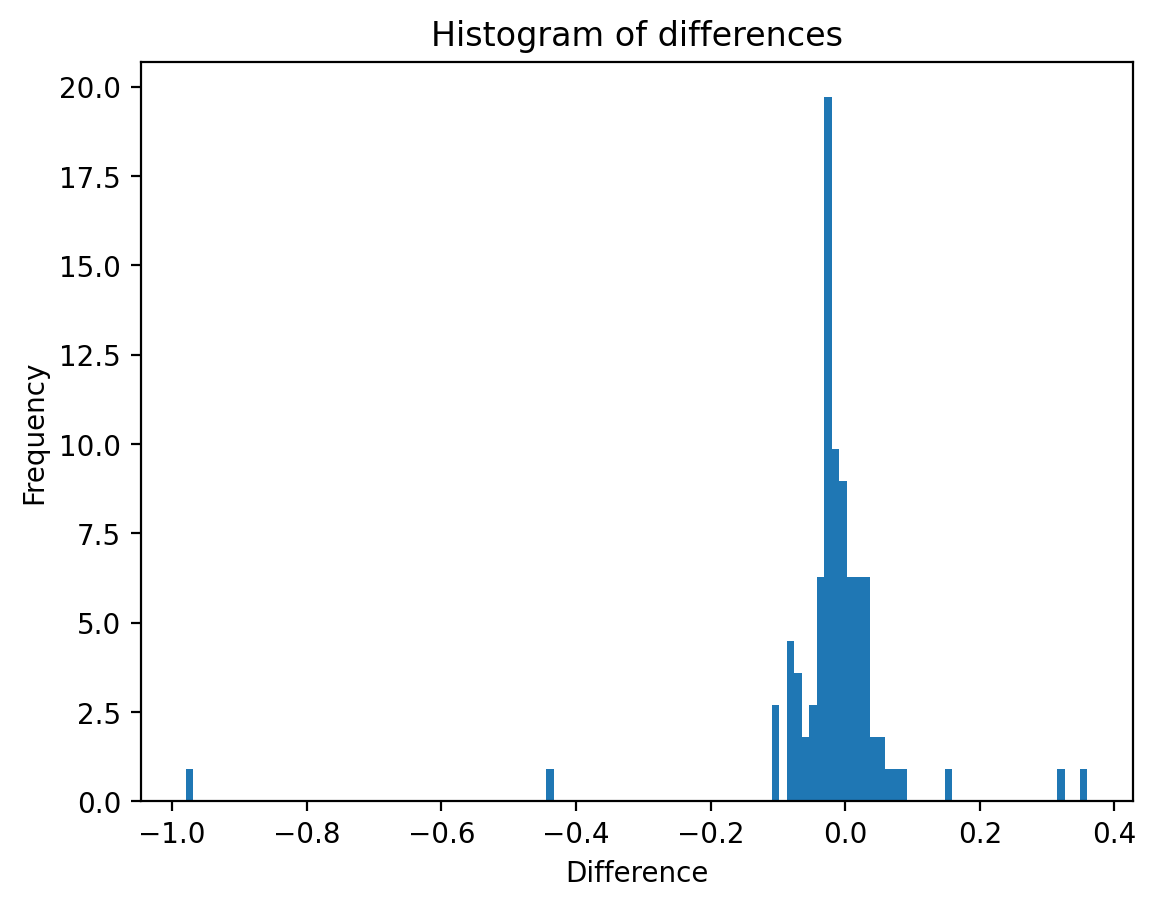

In [12]:
plt.hist(differences, 120, density = True)
plt.title('Histogram of differences')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()


Now pad yourself on the back because you are finished with the 1st of 3 parts. 